In [1]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

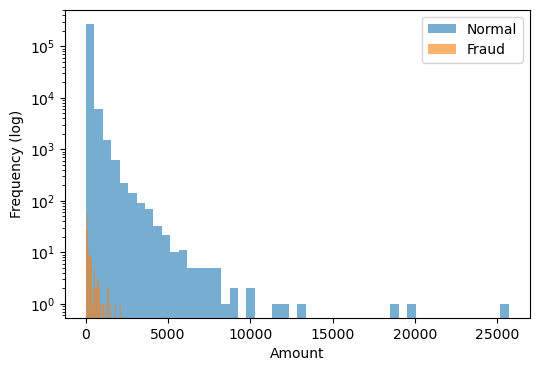

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df[df["Class"]==0]["Amount"], bins=50, alpha=0.6, label="Normal")
plt.hist(df[df["Class"]==1]["Amount"], bins=50, alpha=0.6, label="Fraud")
plt.yscale("log")
plt.xlabel("Amount")
plt.ylabel("Frequency (log)")
plt.legend()
plt.show()

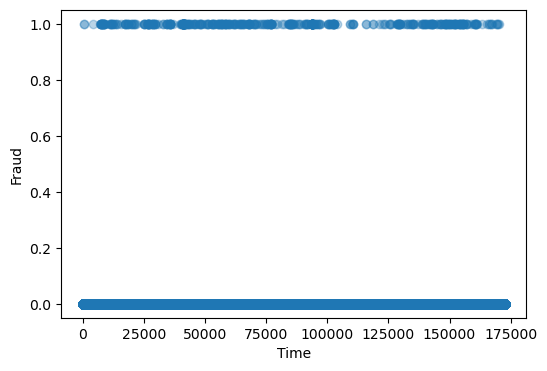

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df["Time"], df["Class"], alpha=0.3)
plt.xlabel("Time")
plt.ylabel("Fraud")
plt.show()

In [6]:
import numpy as np

df["LogAmount"] = np.log1p(df["Amount"])

In [7]:
df = df.drop(columns=["Amount"])

In [8]:
df["Time_sin"] = np.sin(2 * np.pi * df["Time"] / 86400)
df["Time_cos"] = np.cos(2 * np.pi * df["Time"] / 86400)

In [9]:
df = df.drop(columns=["Time"])

In [10]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Class"])
y = df["Class"]

scaler = StandardScaler()
X[["LogAmount", "Time_sin", "Time_cos"]] = scaler.fit_transform(
    X[["LogAmount", "Time_sin", "Time_cos"]]
)

In [11]:
X = df.drop(columns=["Class"])
y = df["Class"] 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[["LogAmount", "Time_sin", "Time_cos"]] = scaler.fit_transform(
    X[["LogAmount", "Time_sin", "Time_cos"]]
)


In [15]:
X[["LogAmount"]].describe()

,LogAmount
count,2.848070e+05
mean,9.101110e-17
std,1.000002e+00
min,-1.902754e+00
25%,-7.636627e-01
50%,-1.007690e-02
75%,7.283598e-01
max,4.226464e+00


In [16]:
X_values = X.values

In [17]:
print(X_values.shape)
print(y.value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [33]:
from sklearn.ensemble import IsolationForest

IsolationForest(
    n_estimators=500,
    max_samples=0.6,
    max_features=0.8,
    contamination=0.0017,
    random_state=42
)

iso.fit(X_values)

IsolationForest(contamination=0.0017, n_estimators=200, n_jobs=-1,
                random_state=42)

In [34]:
iso_preds = iso.predict(X_values)

In [35]:
iso_preds = (iso_preds == -1).astype(int)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, iso_preds))
print(classification_report(y, iso_preds, digits=4))

[[283957    358]
 [   365    127]]
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2619    0.2581    0.2600       492

    accuracy                         0.9975    284807
   macro avg     0.6303    0.6284    0.6294    284807
weighted avg     0.9974    0.9975    0.9975    284807



In [22]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=35,
    contamination=0.0017,
    n_jobs=-1
)

In [23]:
lof_preds = lof.fit_predict(X_values)

In [24]:
lof_preds = (lof_preds == -1).astype(int)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, lof_preds))
print(classification_report(y, lof_preds, digits=4))

[[283841    474]
 [   481     11]]
              precision    recall  f1-score   support

           0     0.9983    0.9983    0.9983    284315
           1     0.0227    0.0224    0.0225       492

    accuracy                         0.9966    284807
   macro avg     0.5105    0.5103    0.5104    284807
weighted avg     0.9966    0.9966    0.9966    284807



In [26]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(
    kernel="rbf",
    gamma="scale",
    nu=0.0017
)

ocsvm.fit(X_values)

OneClassSVM(nu=0.0017)

In [27]:
svm_preds = ocsvm.predict(X_values)

In [28]:
svm_preds = (svm_preds == -1).astype(int)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y, svm_preds))
print(classification_report(y, svm_preds, digits=4))

[[283264   1051]
 [   373    119]]
              precision    recall  f1-score   support

           0     0.9987    0.9963    0.9975    284315
           1     0.1017    0.2419    0.1432       492

    accuracy                         0.9950    284807
   macro avg     0.5502    0.6191    0.5703    284807
weighted avg     0.9971    0.9950    0.9960    284807



In [37]:
iso_scores = -iso.decision_function(X_values)
lof_scores = -lof.negative_outlier_factor_
svm_scores = -ocsvm.decision_function(X_values)

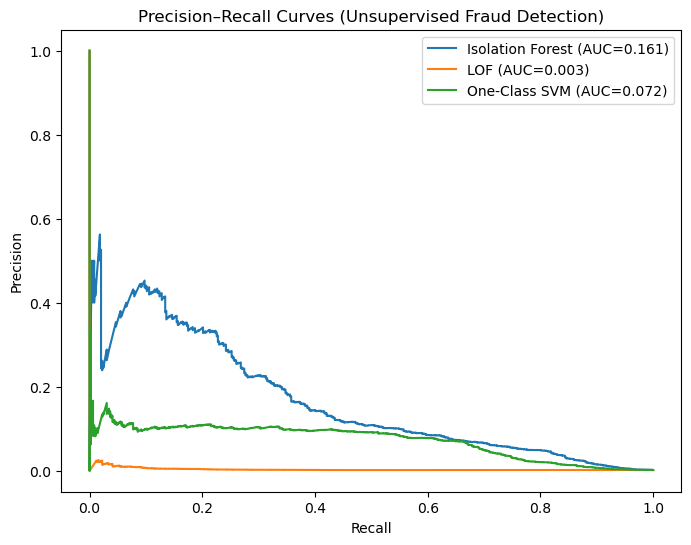

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

models = {
    "Isolation Forest": iso_scores,
    "LOF": lof_scores,
    "One-Class SVM": svm_scores
}

plt.figure(figsize=(8,6))

for name, scores in models.items():
    precision, recall, _ = precision_recall_curve(y, scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (Unsupervised Fraud Detection)")
plt.legend()
plt.show()

In [41]:
import numpy as np
from sklearn.metrics import recall_score, precision_score

percentiles = [99.9, 99.7, 99.5, 99, 98, 97]

for pct in percentiles:
    threshold = np.percentile(iso_scores, pct)
    preds = (iso_scores >= threshold).astype(int)
    
    rec = recall_score(y, preds)
    prec = precision_score(y, preds, zero_division=0)
    
    print(f"Top {100-pct:.1f}% anomalies | Recall: {rec:.3f} | Precision: {prec:.4f}")

Top 0.1% anomalies | Recall: 0.193 | Precision: 0.3333
Top 0.3% anomalies | Recall: 0.341 | Precision: 0.1965
Top 0.5% anomalies | Recall: 0.411 | Precision: 0.1418
Top 1.0% anomalies | Recall: 0.557 | Precision: 0.0962
Top 2.0% anomalies | Recall: 0.709 | Precision: 0.0613
Top 3.0% anomalies | Recall: 0.813 | Precision: 0.0468


In [42]:
pct = 97  
threshold = np.percentile(iso_scores, pct)

iso_preds_high_recall = (iso_scores >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y, iso_preds_high_recall, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9714    0.9853    284315
           1     0.0468    0.8130    0.0885       492

    accuracy                         0.9711    284807
   macro avg     0.5232    0.8922    0.5369    284807
weighted avg     0.9980    0.9711    0.9838    284807



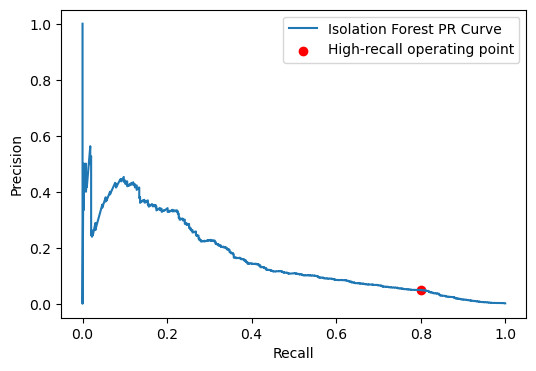

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, iso_scores)
target_recall = 0.80
idx = np.argmin(np.abs(recall - target_recall))

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="Isolation Forest PR Curve")
plt.scatter(recall[idx], precision[idx], color="red", label="High-recall operating point")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import recall_score

print("Isolation Forest Recall:", recall_score(y, iso_preds))
print("LOF Recall:", recall_score(y, lof_preds))
print("One-Class SVM Recall:", recall_score(y, svm_preds))

Isolation Forest Recall: 0.258130081300813
LOF Recall: 0.022357723577235773
One-Class SVM Recall: 0.241869918699187
